In [1]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *
from fastai.datasets import *
from fastai.metrics import error_rate

In [2]:
path = untar_data(URLs.CIFAR)

In [3]:
bs = 64

In [4]:
data = ImageDataBunch.from_folder(path,
                                  valid='test',
                                  ds_tfms=get_transforms(),
                                  size=224,
                                  bs=bs).normalize(imagenet_stats)

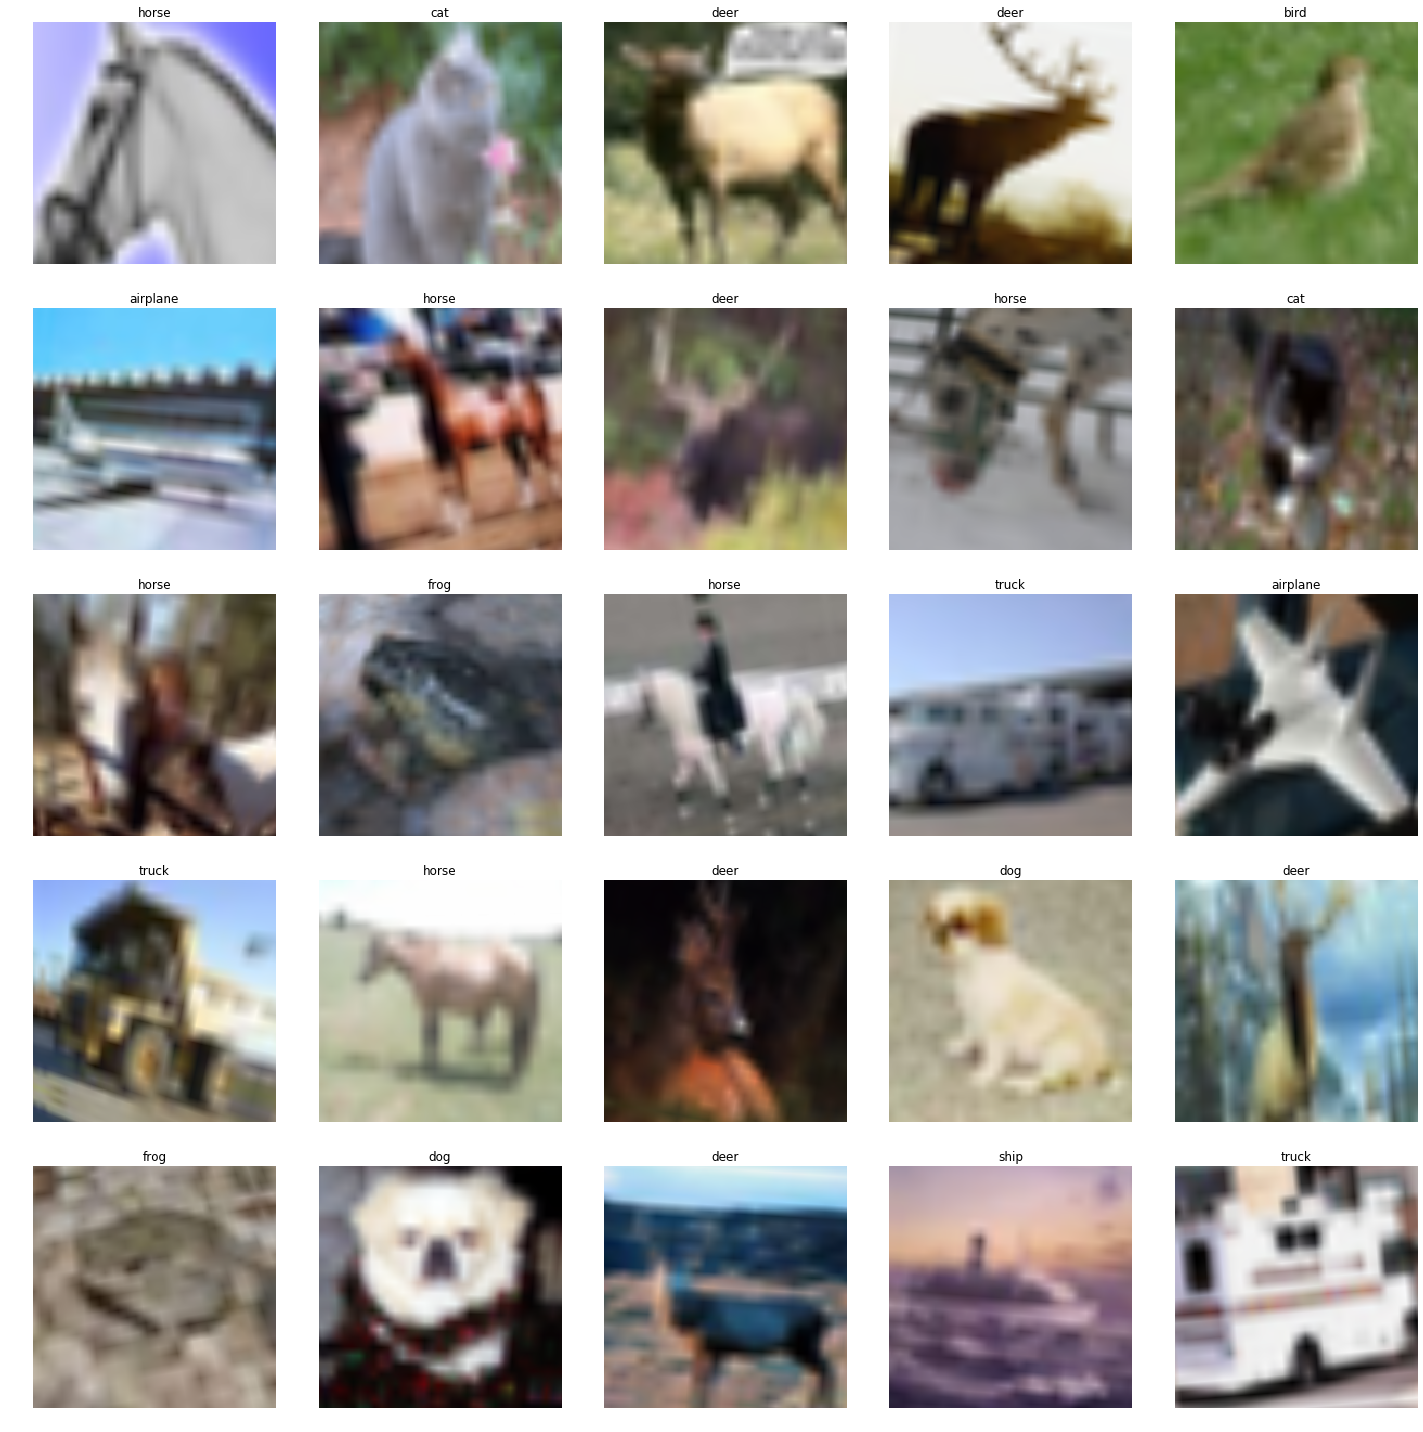

In [5]:
data.show_batch()

In [6]:
learner = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 135036978.42it/s]


In [7]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


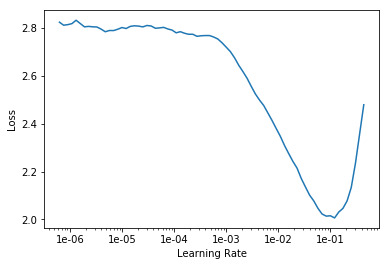

In [8]:
learner.recorder.plot()

In [15]:
learner.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.499246,0.369666,0.123800,04:08
1,0.387236,0.277501,0.097700,04:06
2,0.327186,0.233330,0.080400,04:06
3,0.275319,0.202487,0.068500,04:05
4,0.259756,0.187420,0.064200,04:07


In [16]:
learner.save('cifar_example')